In [1]:
import lightkurve as lk
from vetting import centroid_test

In [2]:
# from s0048-s0048:TCE1
# https://exo.mast.stsci.edu/api/v0.1/Download/file?uri=mast:TESS/product/tess2022028101454-s0048-s0048-0000000004918918-01-00580_dvs.pdf
# can reproduce the TCE centroid offset diagnostics
tic, sector = 4918918, 48  # also in 21
t0=2608.9795
duration=6.9330 / 24
period=3.902121

In [6]:
download_dir = "../../data"

sr = lk.search_targetpixelfile(f"TIC {tic}", mission='TESS', sector=sector)
tpf = sr.download(download_dir=download_dir)
tpf_um = tpf  # keep a copy without additional masking

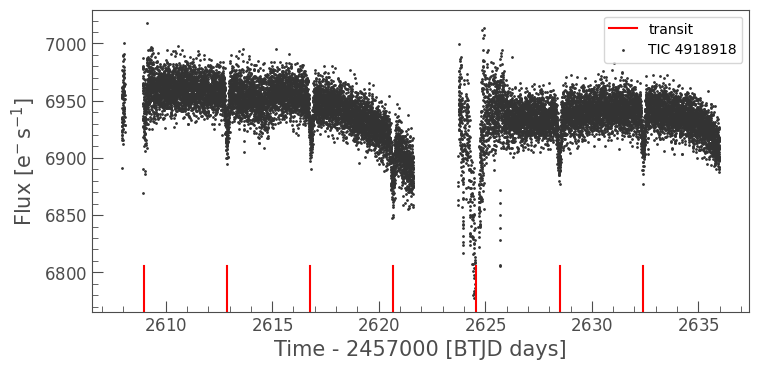

In [5]:
ax = tpf.to_lightcurve().remove_outliers(sigma=7).scatter();
ax.axvline(t0, c='red', ymax=0.15, label="transit");
ax.legend();
for i in [1, 2, 3, 4, 5, 6]: 
    ax.axvline(t0 + period * i, c='red', ymax=0.15, label="transit");

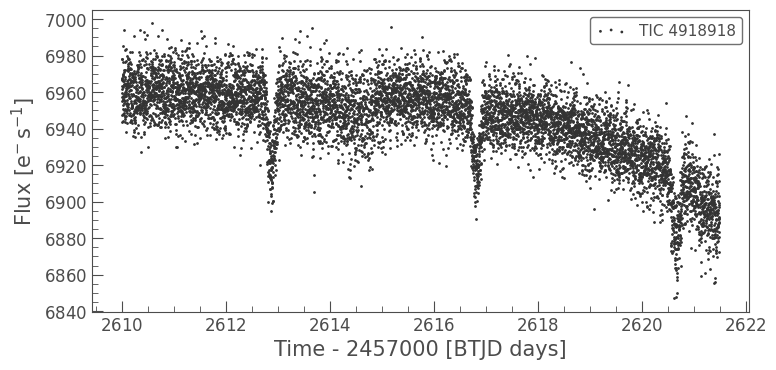

In [8]:
tpf = tpf_um[(2610 <= tpf_um.time.value)  & (tpf_um.time.value <= 2621.5)]
ax = tpf.to_lightcurve().remove_outliers(sigma=7).scatter();

{'figs': [<Figure size 288x288 with 1 Axes>],
 'pvalues': [(0.7332437475411604,)],
 'centroid_offset_detected': [array([False])]}

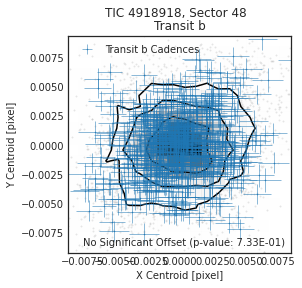

In [9]:
# if p-value is < 0.05 (5%), it means signficant centroid offset
# - distribution of centroid outside dips are not from the same population of the centroid during dips
# UNEXPECTED result: the test does not report signficant centroid shift, even though it is a clear NEB
r = centroid_test(tpf, period, t0, duration, aperture_mask='pipeline', plot=True);
r

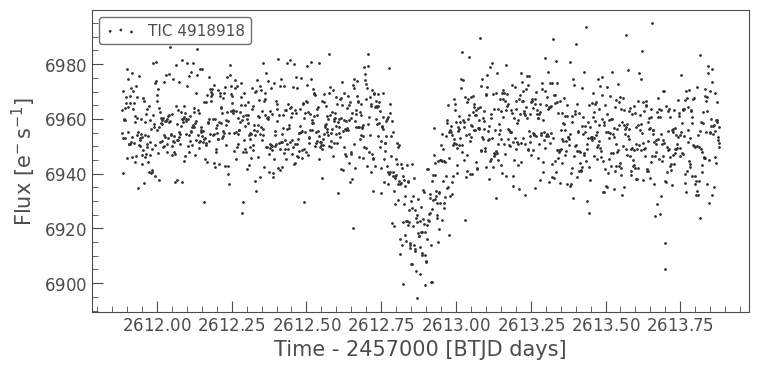

In [11]:
tpf_trunc = tpf[(t0 + period - 1 <= tpf.time.value) & (tpf.time.value <= t0 + period + 1)]
tpf_trunc.to_lightcurve().remove_outliers(sigma=7).scatter();

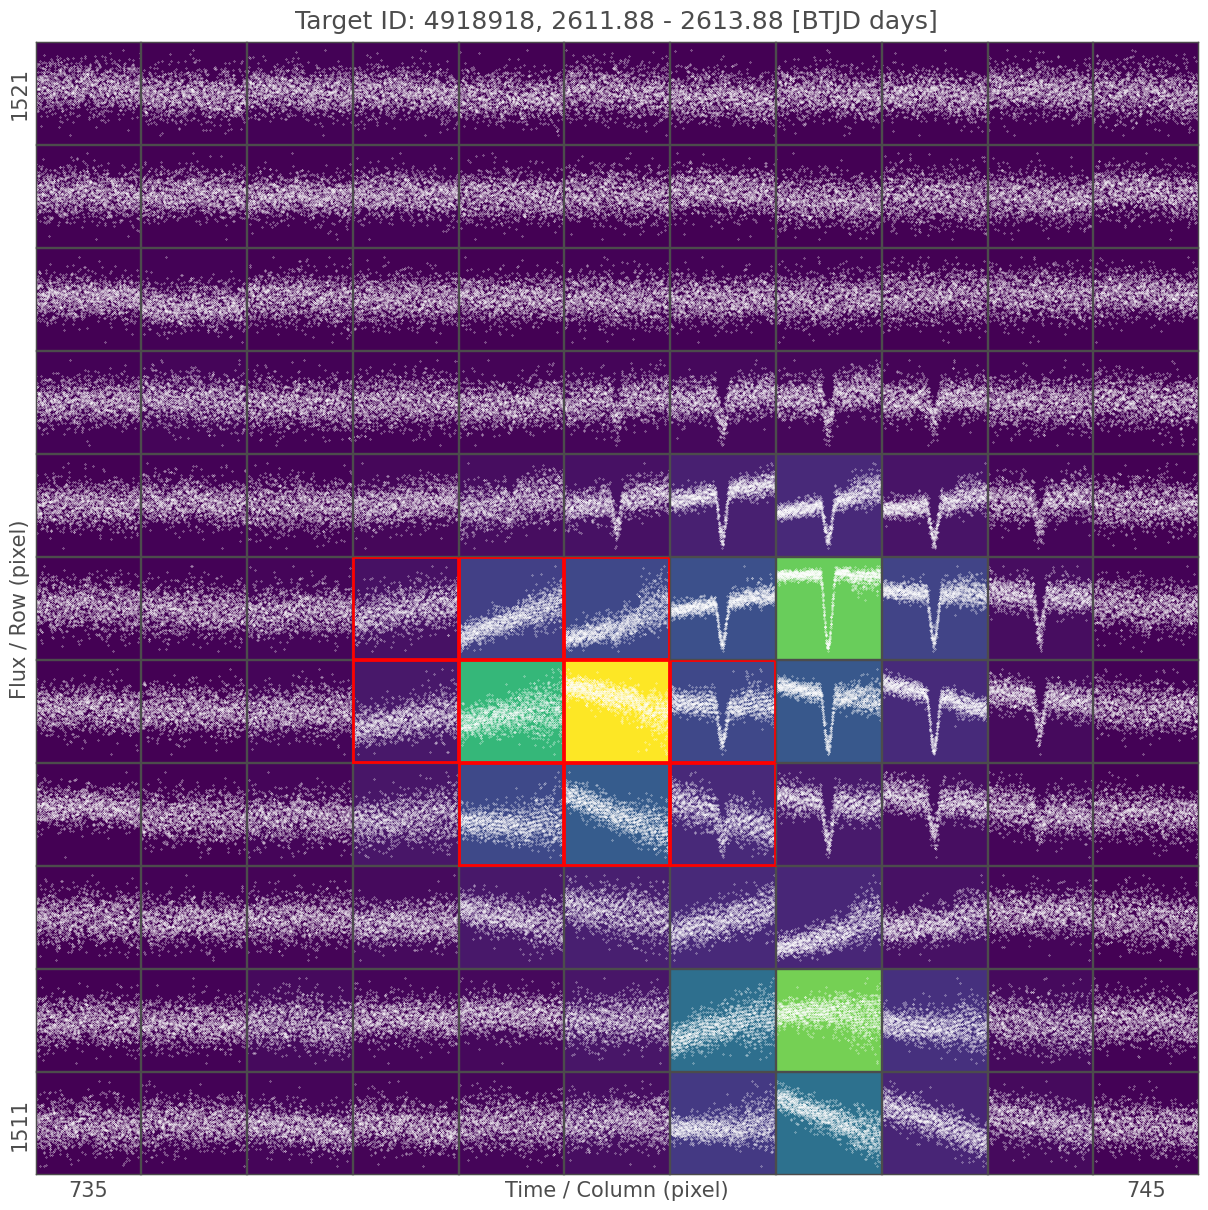

In [12]:
ax = tpf_trunc.plot_pixels(aperture_mask="pipeline", show_flux=True);